In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# Load lemmatized data 

In [3]:
data = pd.read_csv('./data/lemmatized_posts.csv')

In [4]:
data.sample(3)

,post,sent_score,post_nochars,post_tokenized,post_lemmatized,joined_words
2591,calculus is going to keep me from getting a de...,0,calculus is going to keep me from getting a de...,"['calculus', 'going', 'keep', 'getting', 'degr...","['calculus', 'go', 'keep', 'get', 'degree', 't...",calculus go keep get degree track graduate b d...
2884,i’m so scared about leaving my cats for colleg...,0,i’m so scared about leaving my cats for colleg...,"['scared', 'leaving', 'cats', 'collegei', 'sta...","['scared', 'leave', 'cat', 'collegei', 'start'...",scared leave cat collegei start college fall b...
2370,does anyone else get headaches from staring at...,0,does anyone else get headaches from staring at...,"['anyone', 'else', 'get', 'headaches', 'starin...","['anyone', 'else', 'get', 'headache', 'star', ...",anyone else get headache star computer screen ...


In [5]:
data.shape

(3584, 6)

### Train logistic regression ML model using lammatized data

In [6]:
X = data['joined_words']
y = data['sent_score']

In [7]:
y.value_counts(normalize = True)

sent_score
1    0.53404
0    0.46596
Name: proportion, dtype: float64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 2024)

In [9]:
1 - y.mean()

0.4659598214285714

In [10]:
cvec = CountVectorizer()
cvec.fit(X_train)

CountVectorizer()

In [11]:
X_train_cv = cvec.transform(X_train)
X_test_cv = cvec.transform(X_test)

In [12]:
X_train_cv.shape

(2150, 13220)

In [13]:
logreg = LogisticRegression()

In [14]:
logreg.fit(X_train_cv, y_train)

LogisticRegression()

In [15]:
logreg.score(X_train_cv, y_train)

1.0

In [16]:
y_hat_test = logreg.predict(X_test_cv)

In [17]:
logreg.score(X_test_cv, y_test)

0.9644351464435147

#### KFold cross-validation

In [40]:
cross_val_score(logreg, X_test_cv, y_test, cv=5)

array([0.95121951, 0.93728223, 0.95121951, 0.94773519, 0.93006993])

In [ ]:
cross_val_score(logreg, X_train_cv, y_train, cv=5)

In [36]:
np.mean(cross_val_score(logreg, X_train_cv, y_train, cv=5))

0.9511627906976745

In [37]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle = True, random_state=2024)
np.mean(cross_val_score(logreg, X_train_cv, y_train, cv = kf))

0.9553488372093023

### Search for best parameters for RandomForestClassifier

In [18]:
pipe_params = {
    'cvec__max_features': [2_000, 3_000, 4_000, 5_000],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.9, .95],
    'cvec__ngram_range': [(1, 1), (1, 2)]
}

In [19]:
cvec = CountVectorizer(stop_words = 'english', ngram_range=(1,2))

pipe = Pipeline([
    ('cvec', cvec),
    ('logreg', LogisticRegression())
])

In [20]:
gs = GridSearchCV(pipe, 
        param_grid = pipe_params, 
                  cv = 5)

In [21]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(ngram_range=(1, 2),
                                                        stop_words='english')),
                                       ('logreg', LogisticRegression())]),
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [2000, 3000, 4000, 5000],
                         'cvec__min_df': [2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)]})

In [22]:
gs.score(X_train, y_train)

1.0

In [23]:
gs.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': 5000,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 2)}

### Apply trained logreg ML for Sentiment prediction of college posts.

In [24]:
college = pd.read_csv('./data/coll_lemmatized_posts.csv')

In [25]:
college.head()

,post,sent_score,post_tokenized,post_lemmatized,joined_words
0,ever have a kid in class show up and realize i...,0,"['ever', 'kid', 'class', 'show', 'realize', 'e...","['ever', 'kid', 'class', 'show', 'realize', 'e...",ever kid class show realize exam day get leave...
1,"it’s the little things that count, this profes...",0,"['little', 'things', 'count', 'professor', 'ge...","['little', 'thing', 'count', 'professor', 'gem...",little thing count professor gem stay late com...
2,professor saved my assduring winter term at my...,0,"['professor', 'saved', 'assduring', 'winter', ...","['professor', 'save', 'assduring', 'winter', '...",professor save assduring winter term uni bad m...
3,my professor gave out all the answers to the f...,0,"['professor', 'gave', 'answers', 'final', 'lef...","['professor', 'give', 'answer', 'final', 'leav...",professor give answer final leave exam hall ce...
4,an honest letter from your university presiden...,0,"['honest', 'letter', 'university', 'president'...","['honest', 'letter', 'university', 'president'...",honest letter university president open fallde...


In [26]:
X_coll = college['joined_words']
y_coll = college['sent_score']

In [27]:
cvec = CountVectorizer()
cvec.fit(X_coll)

CountVectorizer()

In [28]:
X_coll_cv = cvec.transform(X_coll)

In [29]:
X_train_cv = cvec.transform(X_train)
X_coll_cv = cvec.transform(X_coll)

In [30]:
# if I don't repeat logreg fit, i get error when I predict
logreg.fit(X_train_cv, y_train)

LogisticRegression()

In [31]:
predictions_college = logreg.predict(X_coll_cv)

In [32]:
pred_colls = pd.DataFrame(predictions_college, columns=['predictions'])
pred_colls.sample(5)

,predictions
968,0
35,0
1495,0
1184,0
761,0


In [33]:
print(classification_report(predictions_college, y_coll, digits = 3))

              precision    recall  f1-score   support

           0      0.974     1.000     0.987      1627
           1      0.000     0.000     0.000        43

    accuracy                          0.974      1670
   macro avg      0.487     0.500     0.493      1670
weighted avg      0.949     0.974     0.962      1670



C:\Users\mudep\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mudep\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mudep\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


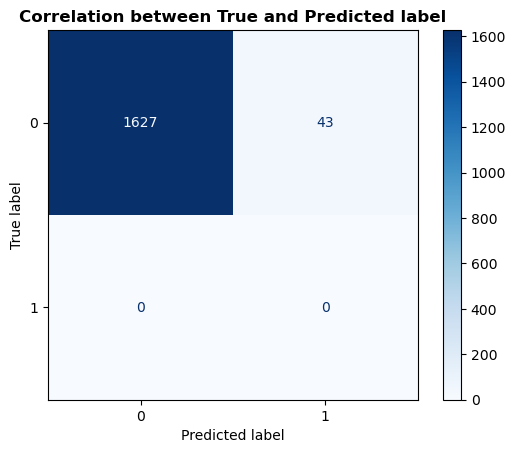

In [34]:
ConfusionMatrixDisplay.from_predictions(y_coll, predictions_college, cmap = 'Blues')
plt.title('Correlation between True and Predicted label', weight = 'bold');

## *Vulgar language warning!!!!*

#### List of all false predicetd posts 

In [35]:
pred_colls = pd.DataFrame(coll_predictions, columns=['predictions'])

NameError: name 'coll_predictions' is not defined

In [ ]:
false_pred = college.iloc[pred_colls[pred_colls['predictions'] == 1].index]
false_pred.sample(5)